<a href="https://colab.research.google.com/github/raj-vijay/dl/blob/master/17_Pooling_in_Convolution_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Pooling in Convolution Neural Networks**

As before, CNNs can have a lot of parameters. Pooling layers are often added between the convolutional layers of a neural network to summarize their outputs in a condensed manner, and reduce the number of parameters in the next layer in the network. 

This can help us if we want to train the network more rapidly, or if we don't have enough data to learn a very large number of parameters.

A pooling layer can be described as a particular kind of convolution. For every window in the input it finds the maximal pixel value and passes only this pixel through.

Convolutional layers in a convolutional neural network summarize the presence of features in an input image.

A problem with the output feature maps is that they are sensitive to the location of the features in the input. One approach to address this sensitivity is to down sample the feature maps. This has the effect of making the resulting down sampled feature maps more robust to changes in the position of the feature in the image, i.e. local translation invariance.

Pooling layers provide an approach to down sampling feature maps by summarizing the presence of features in patches of the feature map. 

Two common pooling methods are average pooling and max pooling that summarize the average presence of a feature and the most activated presence of a feature respectively.



In [0]:
!wget https://raw.githubusercontent.com/raj-vijay/dl/master/images/Brickwork.jpg

--2020-04-24 19:56:26--  https://raw.githubusercontent.com/raj-vijay/dl/master/images/Brickwork.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 130417 (127K) [image/jpeg]
Saving to: ‘Brickwork.jpg.1’

Brickwork.jpg.1     100%[===================>] 127.36K  --.-KB/s    in 0.04s   

2020-04-24 19:56:26 (3.37 MB/s) - ‘Brickwork.jpg.1’ saved [130417/130417]



In [0]:
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
im = plt.imread('Brickwork.jpg')
im = rgb2gray(im)

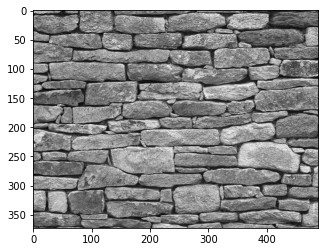

In [0]:
plt.imshow(im, cmap = 'gray')
plt.show()

In [0]:
import numpy as np
# Result placeholder
result = np.zeros((im.shape[0]//2, im.shape[1]//2))

# Pooling operation
for ii in range(result.shape[0]):
    for jj in range(result.shape[1]):
        result[ii, jj] = np.max(im[ii*2:ii*2+2, jj*2:jj*2+2])

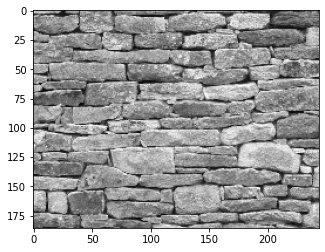

In [0]:
plt.imshow(result, cmap = 'gray')
plt.show()

In [0]:
# Import fundamental libraries used for the tensorflow
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [0]:
# Load the Fashion MNIST Data from TensorFlow Keras
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [0]:
# Shape of data
print("Train Images: ", train_images.shape)
print("Test Images: ", test_images.shape)

Train Images:  (60000, 28, 28)
Test Images:  (10000, 28, 28)


In [0]:
# Reshape input data from (28, 28) to (28, 28, 1)
w, h = 28, 28
train_images = train_images.reshape(train_images.shape[0], w, h, 1)
test_images = test_images.reshape(test_images.shape[0], w, h, 1)

# One-hot encode the labels
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

# Shape of data
print("Reshaped Train Images: ", train_images.shape)
print("Reshaped Test Images: ", test_images.shape)

Reshaped Train Images:  (60000, 28, 28, 1)
Reshaped Test Images:  (10000, 28, 28, 1)


**Keras pooling layers**

Keras implements a pooling operation as a layer that can be added to CNNs between other layers. 

- Convolution => Convolution => Flatten => Dense

The architecture will add a single max-pooling layer between the convolutional layer and the dense layer with a pooling of 2x2:

- Convolution => Max pooling => Convolution => Flatten => Dense

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D

model = Sequential()

# Add a convolutional layer
model.add(Conv2D(100, kernel_size=2, activation='relu', 
                 input_shape=(28, 28, 1)))

# Add a pooling operation
model.add(MaxPool2D(2))

# Add another convolutional layer
model.add(Conv2D(50, kernel_size=2, activation='relu',
input_shape=(28, 28, 1)))

# Flatten and feed to output layer
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 27, 27, 100)       500       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 100)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 12, 12, 50)        20050     
_________________________________________________________________
flatten_3 (Flatten)          (None, 7200)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                72010     
Total params: 92,560
Trainable params: 92,560
Non-trainable params: 0
_________________________________________________________________


**Train a deep CNN with pooling to classify images**

Training a CNN with pooling layers is very similar to training of the deep networks. 

Once the network is constructed, the model needs to be appropriately compiled, and then training data needs to be provided, together with the other arguments that control the fitting procedure.

In [0]:
# Compile the model 
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [0]:
# Fit the model to training data 
model.fit(train_images, train_labels, validation_split=0.2, epochs=3, batch_size=10)

Train on 48000 samples, validate on 12000 samples
Epoch 1/3
48000/48000 [==============================] - 83s 2ms/step - loss: 0.5410 - accuracy: 0.8193 - val_loss: 0.3965 - val_accuracy: 0.8568
Epoch 2/3
48000/48000 [==============================] - 80s 2ms/step - loss: 0.3693 - accuracy: 0.8656 - val_loss: 0.3663 - val_accuracy: 0.8681
Epoch 3/3
48000/48000 [==============================] - 79s 2ms/step - loss: 0.3228 - accuracy: 0.8804 - val_loss: 0.3452 - val_accuracy: 0.8757


**Evaluating a CNN with test data**

To evaluate a trained neural network, provide a separate testing data set of labeled images.

In [0]:
# Evaluate the model on separate test data
model.evaluate(test_images, test_labels, batch_size=10)

10000/10000 [==============================] - 4s 446us/step


[0.3750571946541313, 0.8658000230789185]